# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [ ]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [ ]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results

In [ ]:
corpus = remove_stop_words(corpus)

In [ ]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [ ]:
words = []
for text in corpus:
    print(text)
    for word in text.split(' '):
        words.append(word)
print(words)
words = set(words)
print(len(words))

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen
['king', 'strong', 'man', 'queen', 'wise', 'woman', 'boy', 'young', 'man', 'girl', 'young', 'woman', 'prince', 'young', 'king', 'princess', 'young', 'queen', 'man', 'strong', 'woman', 'pretty', 'prince', 'boy', 'king', 'princess', 'girl', 'queen']
12


here we have word set by which we will have word vector

In [ ]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [ ]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i
print(word2int)

{'princess': 0, 'pretty': 1, 'strong': 2, 'young': 3, 'woman': 4, 'man': 5, 'king': 6, 'wise': 7, 'boy': 8, 'queen': 9, 'prince': 10, 'girl': 11}


In [ ]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
print(sentences)

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


In [ ]:

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] :
            if neighbor != word:
                data.append([word, neighbor])
for d in data:
  print(d)

['king', 'strong']
['king', 'man']
['strong', 'king']
['strong', 'man']
['man', 'king']
['man', 'strong']
['queen', 'wise']
['queen', 'woman']
['wise', 'queen']
['wise', 'woman']
['woman', 'queen']
['woman', 'wise']
['boy', 'young']
['boy', 'man']
['young', 'boy']
['young', 'man']
['man', 'boy']
['man', 'young']
['girl', 'young']
['girl', 'woman']
['young', 'girl']
['young', 'woman']
['woman', 'girl']
['woman', 'young']
['prince', 'young']
['prince', 'king']
['young', 'prince']
['young', 'king']
['king', 'prince']
['king', 'young']
['princess', 'young']
['princess', 'queen']
['young', 'princess']
['young', 'queen']
['queen', 'princess']
['queen', 'young']
['man', 'strong']
['strong', 'man']
['woman', 'pretty']
['pretty', 'woman']
['prince', 'boy']
['prince', 'king']
['boy', 'prince']
['boy', 'king']
['king', 'prince']
['king', 'boy']
['princess', 'girl']
['princess', 'queen']
['girl', 'princess']
['girl', 'queen']
['queen', 'princess']
['queen', 'girl']


In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns = ['input', 'label'])
print(df)


       input     label
0       king    strong
1       king       man
2     strong      king
3     strong       man
4        man      king
5        man    strong
6      queen      wise
7      queen     woman
8       wise     queen
9       wise     woman
10     woman     queen
11     woman      wise
12       boy     young
13       boy       man
14     young       boy
15     young       man
16       man       boy
17       man     young
18      girl     young
19      girl     woman
20     young      girl
21     young     woman
22     woman      girl
23     woman     young
24    prince     young
25    prince      king
26     young    prince
27     young      king
28      king    prince
29      king     young
30  princess     young
31  princess     queen
32     young  princess
33     young     queen
34     queen  princess
35     queen     young
36       man    strong
37    strong       man
38     woman    pretty
39    pretty     woman
40    prince       boy
41    prince      king
42       bo

In [ ]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [ ]:
df.shape

(52, 2)

In [ ]:
word2int

{'princess': 0,
 'pretty': 1,
 'strong': 2,
 'young': 3,
 'woman': 4,
 'man': 5,
 'king': 6,
 'wise': 7,
 'boy': 8,
 'queen': 9,
 'prince': 10,
 'girl': 11}

# Define Tensorflow Graph

In [ ]:
import numpy as np

In [ ]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

NameError: ignored

In [ ]:
print(word2int[man])

NameError: ignored

# Train

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.3874831
iteration 3000 loss is :  1.7615176
iteration 6000 loss is :  1.7135644
iteration 9000 loss is :  1.6936957
iteration 12000 loss is :  1.6818337
iteration 15000 loss is :  1.6735965
iteration 18000 loss is :  1.667389


In [ ]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 4.375873    0.16186821]
 [ 0.19360328  1.7890494 ]
 [ 6.1193333  -0.08758414]
 [-1.2201542   4.6891165 ]
 [-0.20656192 -0.23423088]
 [-0.01745999  5.9915733 ]
 [-2.5089917  -0.02818429]
 [ 4.438786   -2.2695527 ]
 [-0.3406      1.524016  ]
 [ 1.0877191  -0.10649729]
 [-0.20683467  0.7571343 ]
 [ 1.1867361  -0.2494669 ]]


# word vector in table

In [ ]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,man,4.375873,0.161868
1,woman,0.193603,1.789049
2,prince,6.119333,-0.087584
3,wise,-1.220154,4.689116
4,young,-0.206562,-0.234231
5,princess,-0.017460,5.991573
6,pretty,-2.508992,-0.028184
7,strong,4.438786,-2.269553
8,girl,-0.340600,1.524016
9,king,1.087719,-0.106497


# word vector in 2d chart

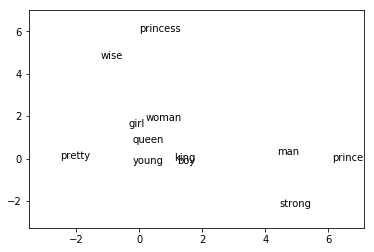

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()